# Лабораторная работа №1

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import re
import scipy.stats as sps
from matplotlib.lines import Line2D

## 1.	Загрузите данные в ноутбук

In [5]:
data = pd.read_excel('.\data\Вариант 3.xlsx', 
                     header=2, 
                     index_col='№',
                     dtype={'Первичный балл	': np.float64,
                            'Балл': np.float64,
                            'Минимальный балл': np.float64}).iloc[:-1]

data.tail()

,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл
№,,,,,,,,,,
1176.0,148.0,11,М,332.0,++++222+++22+++222++2++2+++,3(3)3(3)3(3)3(3)2(3),NaN,51.0,98.0,36.0
1177.0,148.0,11,М,330.0,++++222+++22+++222++2++2+++,3(3)3(3)3(3)3(3)2(3),NaN,51.0,98.0,36.0
1178.0,152.0,11,Ж,330.0,++++222+++22+++222++2++2+++,3(3)3(3)3(3)2(3)3(3),NaN,51.0,98.0,36.0
1179.0,147.0,11,М,332.0,++++222+++22+++222++2++2+++,3(3)3(3)3(3)3(3)3(3),NaN,52.0,100.0,36.0
1180.0,148.0,11,М,328.0,++++222+++22+++222++2++2+++,3(3)3(3)3(3)3(3)3(3),NaN,52.0,100.0,36.0


In [6]:
data.dtypes

№ школы                          float64
Класс                             object
Пол                               object
Номер варианта                   float64
Задания с кратким ответом         object
Задания с развёрнутым ответом     object
Устная часть                      object
Первичный балл                   float64
Балл                             float64
Минимальный балл                 float64
dtype: object

## 2.	Сделайте описательную статистику по среднему баллу

In [7]:
data['Балл'].describe()

count    1180.000000
mean       52.047458
std        14.965477
min        10.000000
25%        41.000000
50%        49.000000
75%        60.250000
max       100.000000
Name: Балл, dtype: float64

## 3.	Найдите процент учащихся, выполнивших работу ниже среднего

In [8]:
pr = round(data[data['Балл'] < data['Балл'].mean()]['Балл'].count() / data['Балл'].count() * 100, 2)
print(f'Процент учащихся, набравших меньше среднего = {pr}%')

Процент учащихся, набравших меньше среднего = 56.27%


## 4.	Найти процент учащихся не сдавших экзамен

In [9]:
pr = round(data[data['Балл'] < data['Минимальный балл']]['Балл'].count() / data['Балл'].count() * 100, 2)
print(f'Процент учащихся, не сдавших экзамен = {pr}%')

Процент учащихся, не сдавших экзамен = 7.71%


## 5.	Постройте круговую диаграмму, показывающую распределение сдавших и не сдавших экзамен

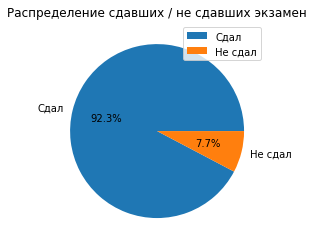

In [10]:
not_passed = round(data[data['Балл'] < data['Минимальный балл']]['Балл'].count() / data['Балл'].count() * 100, 2)
plt.pie([100 - not_passed, not_passed], labels=['Сдал', 'Не сдал'], autopct='%1.1f%%')
plt.title('Распределение сдавших / не сдавших экзамен')
plt.legend(['Сдал', 'Не сдал'])
plt.show()

## 6.	Постройте гистограмму по распределению баллов за экзамен. Соответствует ли оно нормальному распределению?

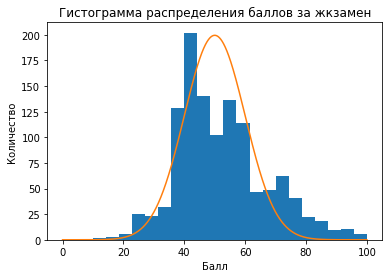

In [48]:
plt.hist(data["Балл"], bins=21)
plt.title('Гистограмма распределения баллов за жкзамен')
plt.ylabel('Количество')
plt.xlabel('Балл')
plt.plot(np.linspace(0, 100, num=100000), sps.norm(50, 10).pdf(np.linspace(0, 100, num=100000))*5000)
plt.show()

## 7.	Постройте оценку ядерной плотности распределению баллов за экзамен

Text(0.5, 1.0, 'Оценка ядерной плотности распределения баллов')

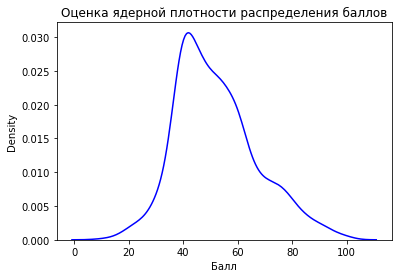

In [49]:
import seaborn as sns

sns.kdeplot(data['Балл'], color='b').set_title("Оценка ядерной плотности распределения баллов")

## 8.	Найдите процентное соотношение учащихся, сдавших экзамен на «отлично», «хорошо», «удовлетворительно», «неудовлетворительно». Сделайте графическое представление данного распределения

In [50]:
r2 = round(data[data['Балл'] <= 35]['Балл'].count() / data['Балл'].count() * 100, 2)
r3 = round(data[(data['Балл'] > 35) & (data['Балл'] <= 50)]['Балл'].count() / data['Балл'].count() * 100, 2)
r4 = round(data[(data['Балл'] > 50) & (data['Балл'] <= 75)]['Балл'].count() / data['Балл'].count() * 100, 2)
r5 = round(data[data['Балл'] > 75]['Балл'].count() / data['Балл'].count() * 100, 2)
r2, r3, r4, r5

(7.71, 42.71, 40.42, 9.15)

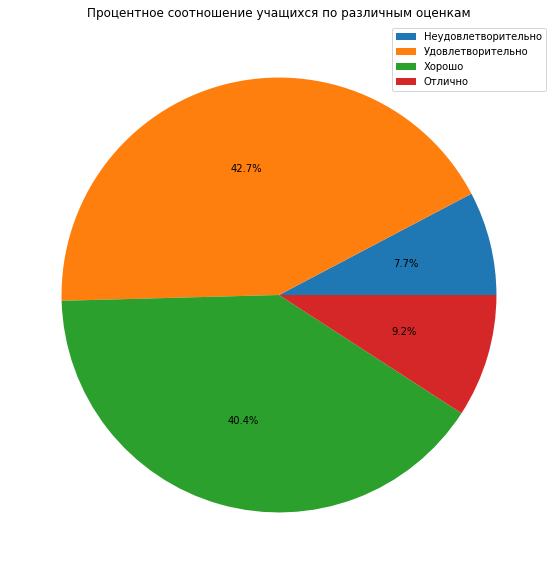

In [53]:
plt.figure(1, (10, 10))
plt.pie([r2, r3, r4, r5], autopct='%1.1f%%')
plt.legend(['Неудовлетворительно', 'Удовлетворительно', 'Хорошо', 'Отлично'])
plt.title('Процентное соотношение учащихся по различным оценкам')
plt.show()

## 9.	Постройте «ящиковые диаграммы», сравнивающие баллы учащихся, сдавших экзамен на «отлично», «хорошо», «удовлетворительно», «неудовлетворительно»

In [54]:
r2 = data[data['Балл'] <= 35]['Балл']
r3 = data[(data['Балл'] > 35) & (data['Балл'] <= 50)]['Балл']
r4 = data[(data['Балл'] > 50) & (data['Балл'] <= 75)]['Балл']
r5 = data[data['Балл'] > 75]['Балл']

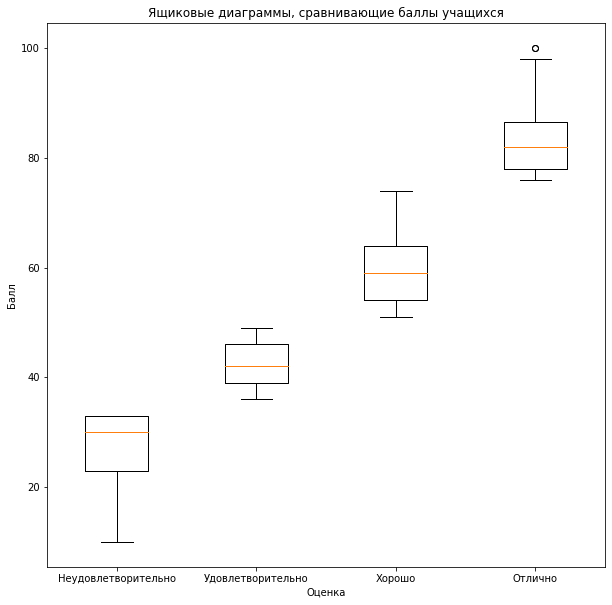

In [55]:
plt.figure(1, (10, 10))
plt.boxplot([r2, r3, r4, r5], 
            labels = ['Неудовлетворительно', 'Удовлетворительно', 'Хорошо', 'Отлично'])

plt.title('Ящиковые диаграммы, сравнивающие баллы учащихся')
plt.xlabel('Оценка')
plt.ylabel('Балл')
plt.show()

## 10.	Какое процентное соотношение юношей и девушек писало данный экзамен? Представьте графически

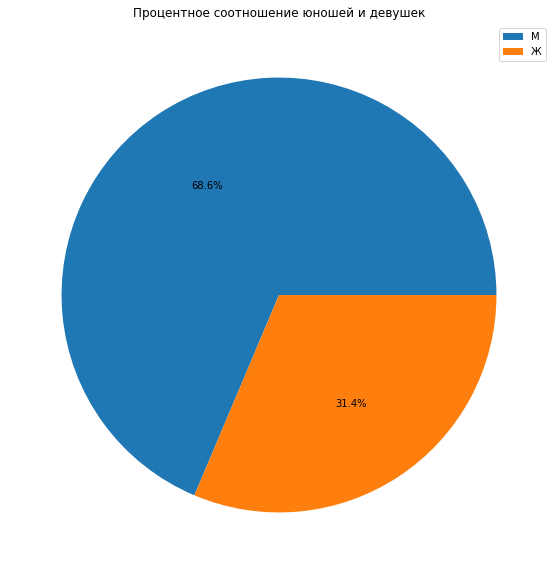

In [56]:
women = round(data[data['Пол'] == 'Ж']['Пол'].count() / data['Пол'].count() * 100, 2)
plt.figure(1, (10, 10))
plt.pie([100 - women, women], autopct='%1.1f%%')
plt.title('Процентное соотношение юношей и девушек')
plt.legend(['М', 'Ж'])
plt.show()

## 11.	Постройте диаграмму рассеивания, позволяющую увидеть средние баллы девушек и юношей

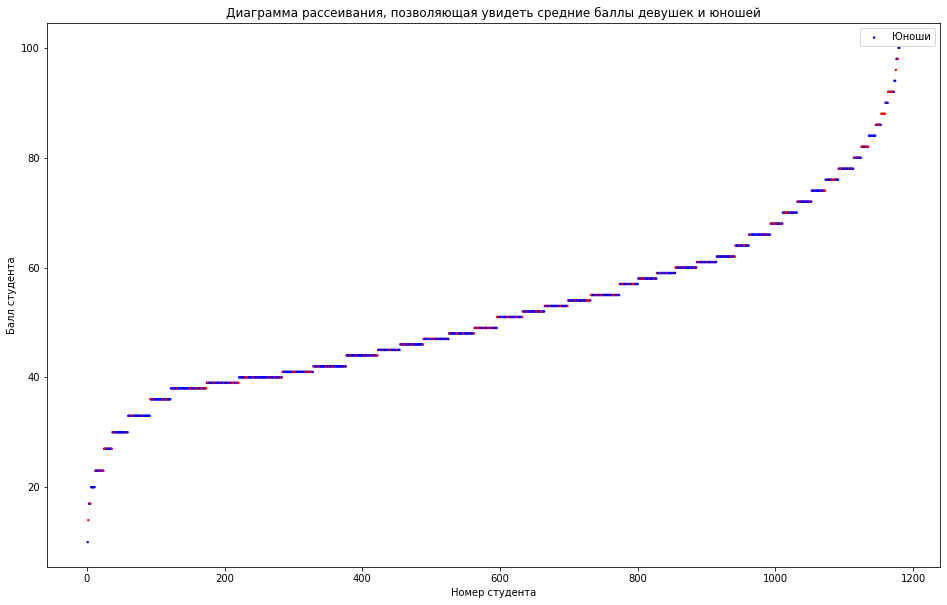

In [58]:
plt.figure(1, (16, 10))
ax = plt.scatter(data.reset_index()['№'], data['Балл'], c=np.where(data['Пол']=='М', 'blue', 'red'), s=2)
plt.legend(['Юноши', 'Девушки'])
plt.title('Диаграмма рассеивания, позволяющая увидеть средние баллы девушек и юношей')
plt.xlabel('Номер студента')
plt.ylabel('Балл студента')
plt.show()

## 12.	Сколько школ (код ППЕ) принимало участие в экзамене?

In [59]:
schools = data['№ школы'].unique()
print(f'В экзамене принимало участие {len(schools)} школ')

В экзамене принимало участие 19 школ


## 13.	Постройте диаграмму, позволяющую сравнить средние баллы за экзамен по школам. Если какие-нибудь выбросы?

In [60]:
points_grouped_by_schools = data.groupby('№ школы').groups
for key in points_grouped_by_schools.keys():
    points_grouped_by_schools[key] = data.loc[points_grouped_by_schools[key]]['Балл']

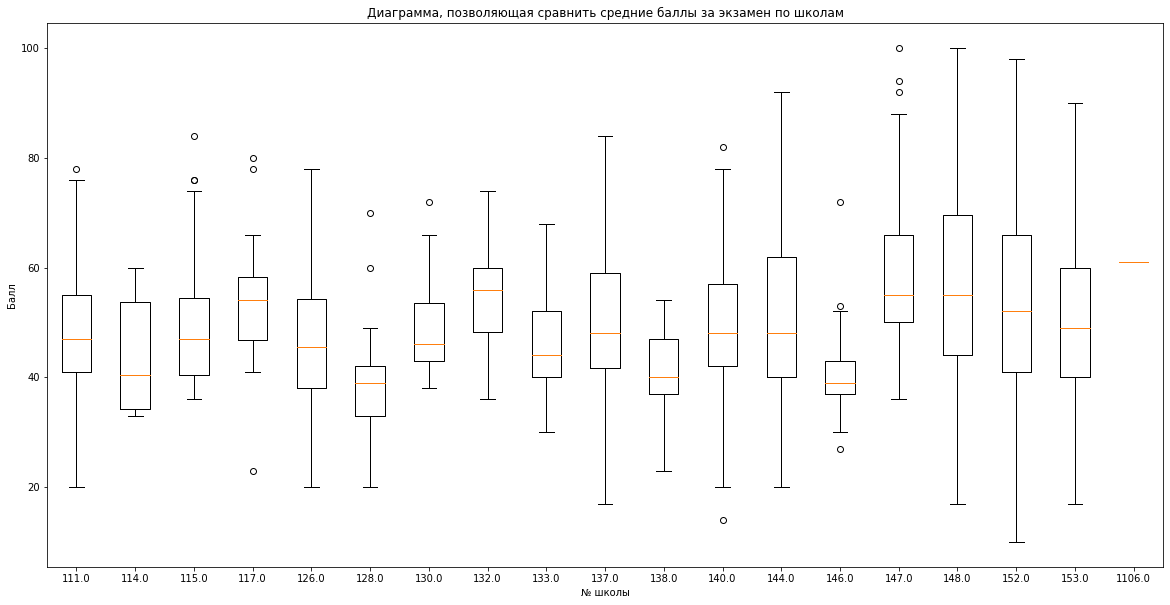

In [64]:
schools, points = points_grouped_by_schools.keys(), points_grouped_by_schools.values()

plt.figure(1, (20, 10))
plt.boxplot(points,
            labels = schools)
plt.title('Диаграмма, позволяющая сравнить средние баллы за экзамен по школам')
plt.xlabel('№ школы')
plt.ylabel('Балл')
plt.show()

Да, выбросы имеются, например в 117 школе сильно выделяется ученик, набравший ~22 балла. В других школах также имеются выбросы

# __Повышенной сложности:__

## 1.	Сколько всего заданий с кратким ответом? С развернутым ответом?

In [65]:
kr = len(data.loc[1]['Задания с кратким ответом'])
raz = data.loc[1]['Задания с развёрнутым ответом'].count('(3)')
print(f'Всего {kr} заданий с кратким ответов \nВсего {raz} заданий с развернутым ответов')

Всего 27 заданий с кратким ответов 
Всего 5 заданий с развернутым ответов


## 2.	Пусть задания с кратким ответом будут задания типа В. Соответственно всего по экзамену вопросов класса В: В1 … Вк  Посчитайте процент выполненных и невыполненных заданий по каждому вопросу класса В. Постройте гистограмму, позволяю щую увидеть данное распределение. Какие есть выпады по данному распределению?

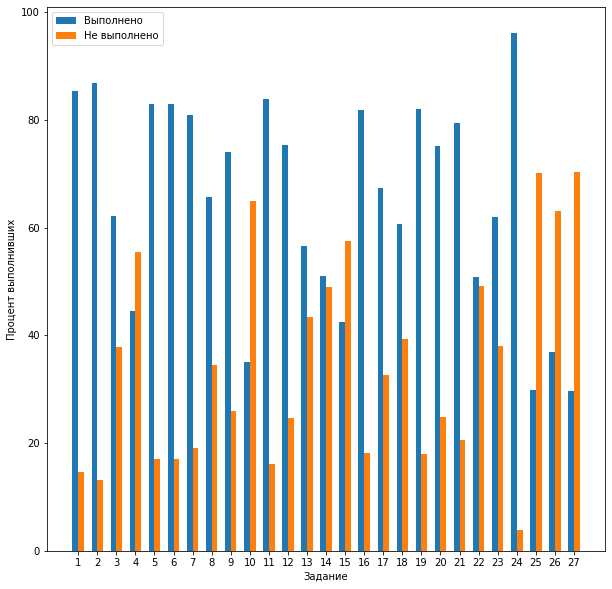

In [77]:
kratk = []
for row in data['Задания с кратким ответом']:
    kratk.append([c for c in row])
df = pd.DataFrame(kratk)
df = df.replace('0', 0).replace('-', 0).replace('1', 1).replace('+', 1).replace('2', 1)

done = df.sum(axis=0) * 100 / df.shape[0]
not_done = 100 - done


g1 = done.to_list()
g2 = not_done.to_list()

width = 0.3

x = np.arange(len(done)) + 1

plt.figure(1, (10, 10))

plt.bar(x - width/2, g1, width, label='Выполнено')
plt.bar(x + width/2, g2, width, label='Не выполнено')

plt.xticks(x)
plt.legend()

plt.xlabel('Задание')
plt.ylabel('Процент выполнивших')
plt.show()

Из явных выпадов видно, что с заданием B24 справилось подавляющее большинство сдававших

## 3.	Аналогично и с типом С (ответы с развернутым ответом)

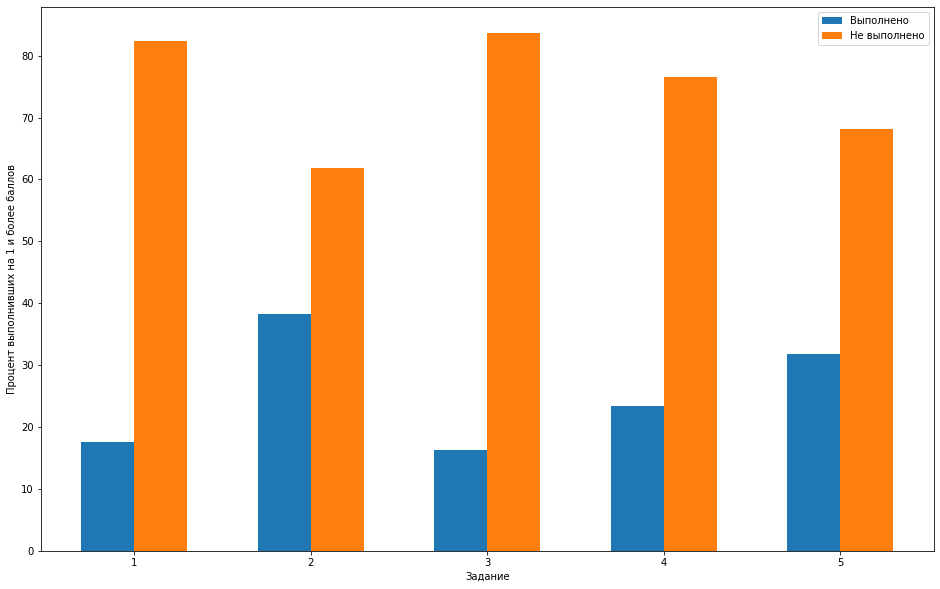

In [76]:
razv = []
for row in data['Задания с развёрнутым ответом']:
    razv.append(row.split('(3)')[:-1])
df = pd.DataFrame(razv)
df = df.replace('0', 0).replace('1', 1).replace('2', 1).replace('3', 1)
done = df.sum(axis=0) * 100 / df.shape[0]
not_done = 100 - done

g1 = done.to_list()
g2 = not_done.to_list()

width = 0.3

x = np.arange(len(done)) + 1

plt.figure(1, (16, 10))
plt.bar(x - width/2, g1, width, label='Выполнено')
plt.bar(x + width/2, g2, width, label='Не выполнено')


plt.xticks(x)

plt.legend()

plt.xlabel('Задание')
plt.ylabel('Процент выполнивших на 1 и более баллов')
plt.show()

Явных выпадов не видно, но можно заметить, что с C2 справляется больше людей, чем с остальными задачами

## 4.	Сделайте анализ по двум школам:
* А) по всем выполненным заданиям типа В
* Б) по заданиям типа С больше 50%
* В) по среднему балу юношей и девушек


### A) по всем выполненным заданиям типа В

In [301]:
first_school, second_school = 140, 153

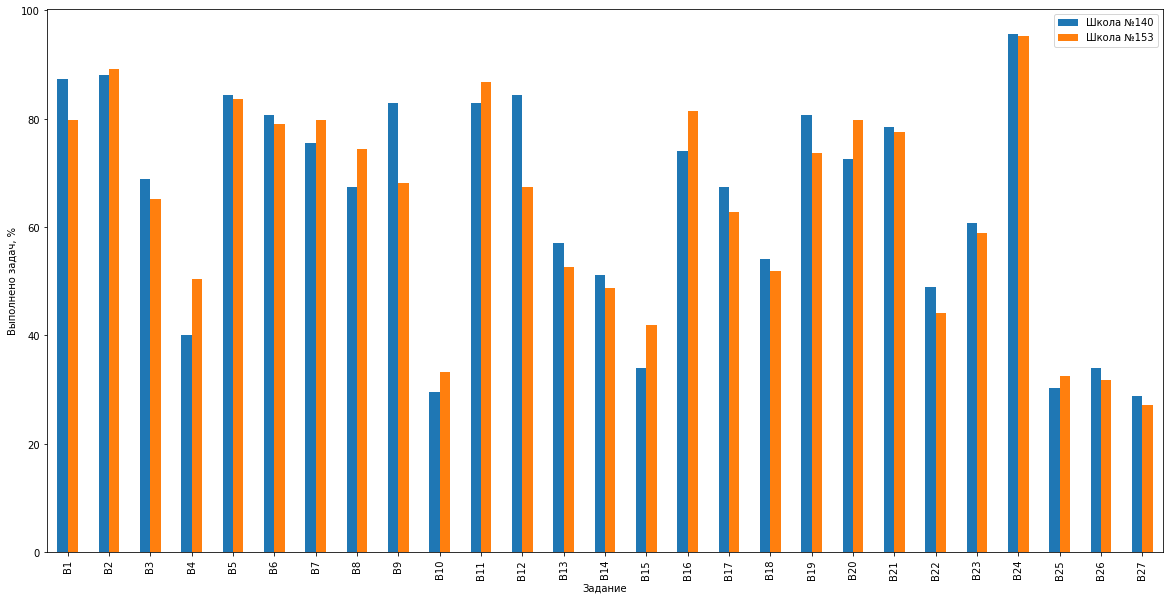

### Б) по заданиям типа С больше 50%

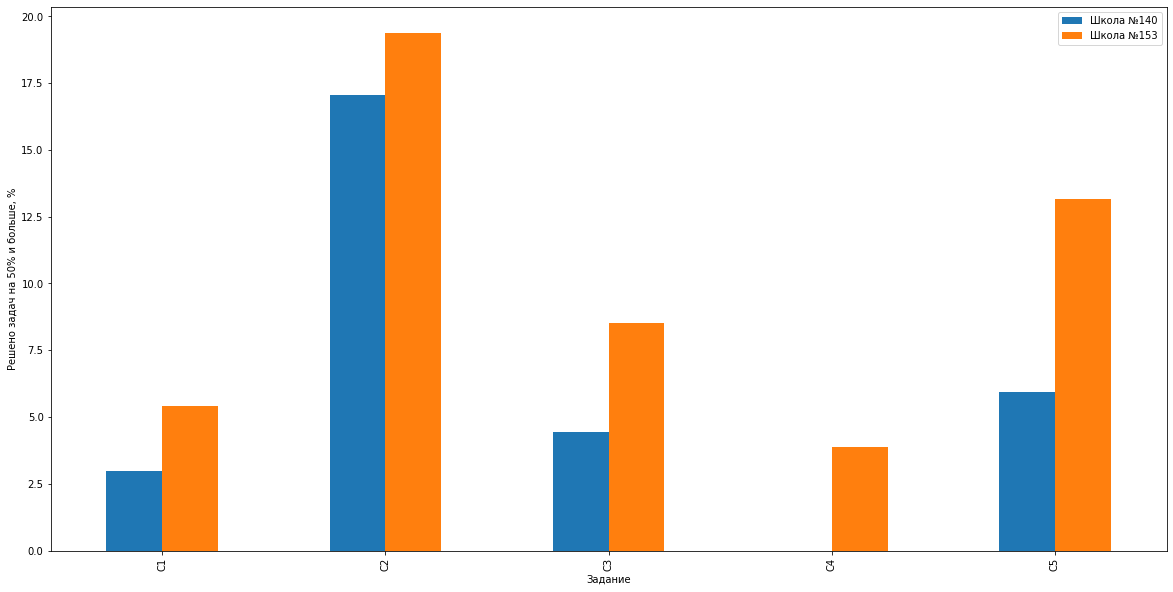

В школе №140 никто не решил С4 более, чем на 50%

### в) по среднему балу юношей и девушек

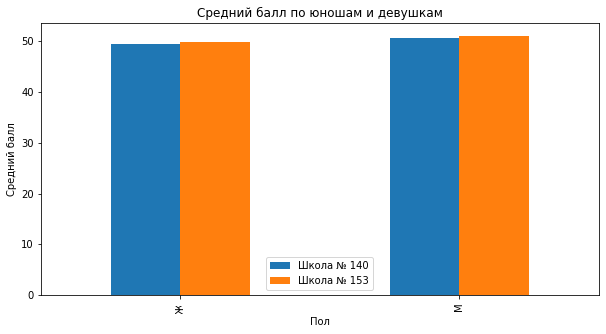